Part 3 - Predictive Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.shape

(50000, 12)

In [5]:
no_trips = df['trips_in_first_30_days'] == 0

In [6]:
df[no_trips]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
17,King's Landing,0,2014-01-12,3.9,1.00,2014-07-01,iPhone,0.0,True,95.2,2.38,4.8
19,King's Landing,0,2014-01-02,5.0,1.17,2014-06-03,iPhone,33.3,False,66.7,12.08,5.0
22,Winterfell,0,2014-01-24,NaN,1.00,2014-05-02,iPhone,0.0,False,100.0,11.47,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49986,Winterfell,0,2014-01-21,4.0,1.00,2014-05-23,Android,0.0,False,100.0,0.52,5.0
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


In [7]:
df[no_trips].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,15390.0,11641.000000,15390.000000,15390.000000,15390.000000,15390.000000,15296.000000
mean,0.0,4.632721,1.071320,8.512982,61.299350,6.397854,4.791200
std,0.0,0.655351,0.238503,22.000314,41.312242,6.527654,0.499961
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,4.500000,1.000000,0.000000,16.700000,2.350000,4.800000
50%,0.0,5.000000,1.000000,0.000000,75.000000,4.150000,5.000000
75%,0.0,5.000000,1.000000,0.000000,100.000000,8.060000,5.000000
max,0.0,5.000000,5.000000,100.000000,100.000000,160.960000,5.000000


In [8]:
no_trips

0        False
1         True
2        False
3        False
4        False
         ...  
49995     True
49996    False
49997     True
49998    False
49999     True
Name: trips_in_first_30_days, Length: 50000, dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We have 12 columns. avg_rating_of_driver, phone, and avg_rating_by_driver have some missing data. We will be filling in all of these values with means or randomly assign phone based on current ratios. 

In [10]:
df.describe()


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [11]:
df.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [12]:
# Filling phone data

# Calculate the existing ratio
existing_ratios = df['phone'].value_counts(normalize=True)

# Function to randomly fill missing values based on ratios
def fill_missing_phone(row):
    if pd.isna(row['phone']):
        return np.random.choice(existing_ratios.index, p=existing_ratios.values)
    else:
        return row['phone']

# Apply the function to fill missing values in the 'phone' column
df['phone'] = df.apply(fill_missing_phone, axis=1)

In [13]:
#fill missing values with averages
avg_arbd = df['avg_rating_by_driver'].mean()
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=avg_arbd)

avg_arod = df['avg_rating_of_driver'].mean()
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=avg_arod)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
df.trips_in_first_30_days.value_counts()

0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
15       155
14       147
17       113
16       108
18        80
19        69
20        51
23        45
21        40
22        34
24        33
27        28
28        21
25        20
26        19
30        15
34        11
29         9
37         9
33         9
32         8
31         6
44         5
40         5
43         4
38         4
39         3
36         3
47         3
42         3
53         2
48         2
49         2
55         2
35         2
54         2
56         2
71         1
73         1
125        1
41         1
50         1
63         1
51         1
58         1
Name: trips_in_first_30_days, dtype: int64

In [16]:
# Convert 'last_trip_date' and 'signup_date' to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [17]:
df['active180'] = df['last_trip_date'] - df['signup_date'] >= pd.Timedelta(6*30, unit='days')

In [18]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active180
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [19]:
most_recent_date = df['last_trip_date'].max()
print("Most recent last_trip_date:", most_recent_date)

Most recent last_trip_date: 2014-07-01 00:00:00


In [20]:
# Define the reference date
reference_date = pd.to_datetime('2014-07-01')

# Calculate the preceding 30 days from the reference date
preceding_30_days = reference_date - pd.DateOffset(days=30)

# Create the 'active30' column based on the date comparison
df['active30'] = (df['last_trip_date'] >= preceding_30_days)


In [21]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active180,active30
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False


In [22]:
# Transform 'active30' to binary (1 for True, 0 for False)
df['active30'] = df['active30'].astype(int)

# Transform 'active180' to binary (1 for True, 0 for False)
df['active180'] = df['active180'].astype(int)

In [23]:
# Describe the 'active30' column
active30_stats = df['active30'].describe()

# Describe the 'active180' column
active180_stats = df['active180'].describe()

# Print the statistics
print("Statistics for 'active30' column:")
print(active30_stats)

print("\nStatistics for 'active180' column:")
print(active180_stats)

Statistics for 'active30' column:
count    50000.000000
mean         0.376080
std          0.484405
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: active30, dtype: float64

Statistics for 'active180' column:
count    50000.000000
mean         0.001700
std          0.041196
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: active180, dtype: float64


In [24]:
# creating df_180. Where we have at least 6 months of data per user. 
# Define the reference date
reference_date = pd.to_datetime('2014-07-01')

# Calculate the date 6 months prior to the reference date
six_months_ago = reference_date - pd.DateOffset(days=180)

# Create the new DataFrame 'df_180' with users who signed up more than 6 months ago
df_180 = df[df['signup_date'] < six_months_ago].copy()

six_months_ago


Timestamp('2014-01-02 00:00:00')

In [25]:
df_180.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737 entries, 68 to 49973
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    1737 non-null   object        
 1   trips_in_first_30_days  1737 non-null   int64         
 2   signup_date             1737 non-null   datetime64[ns]
 3   avg_rating_of_driver    1737 non-null   float64       
 4   avg_surge               1737 non-null   float64       
 5   last_trip_date          1737 non-null   datetime64[ns]
 6   phone                   1737 non-null   object        
 7   surge_pct               1737 non-null   float64       
 8   ultimate_black_user     1737 non-null   bool          
 9   weekday_pct             1737 non-null   float64       
 10  avg_dist                1737 non-null   float64       
 11  avg_rating_by_driver    1737 non-null   float64       
 12  active180               1737 non-null   int32 

In [26]:
# Describe the 'active30' column
active30_stats_180 = df_180['active30'].describe()

# Describe the 'active180' column
active180_stats_180 = df_180['active180'].describe()

# Print the statistics
print("Statistics for 'active30' column (for users with at least 180 days):")
print(active30_stats_180)

print("\nStatistics for 'active180' column (for users with at least 180 days):")
print(active180_stats_180)

Statistics for 'active30' column (for users with at least 180 days):
count    1737.000000
mean        0.406448
std         0.491311
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: active30, dtype: float64

Statistics for 'active180' column (for users with at least 180 days):
count    1737.000000
mean        0.042602
std         0.202017
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: active180, dtype: float64


Above we essentially created four different ways to look at the data. The latter, shows us overall which users are active during the last 30 days. That number appears to be 37.6%. After that, we figured out percentage of users that are active 6 months after sign up. Following that. Following that, we figured out the percentage of users that have been signed up for at least 6 month and were active in the last 30 days (40.6%). Lastly, we figured out the users that have been signed up for 6 months and the last time they used us has been greater that 6 months from that sign up date. 

It seems that the best number to look at would be df_180 active30 or the percentage of users that have been signed up for at least 6 month and were active in the last 30 days (40.6%). Since the prompt asks us to "Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system."

In [27]:
df_180.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active180,active30
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,1.517559,4.602721,1.089321,9.627922,62.815947,5.586269,4.760949,0.042602,0.406448
std,3.176610,0.552011,0.311210,21.523760,36.045966,5.202181,0.464850,0.202017,0.491311
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,37.500000,2.400000,4.700000,0.000000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.750000,5.000000,0.000000,0.000000
75%,2.000000,5.000000,1.050000,8.700000,100.000000,6.550000,5.000000,0.000000,1.000000
max,54.000000,5.000000,8.000000,100.000000,100.000000,41.830000,5.000000,1.000000,1.000000


In [28]:
df_180.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active180,active30
68,King's Landing,0,2014-01-01,5.000000,1.0,2014-06-15,iPhone,0.0,True,0.0,4.44,5.0,0,1
71,Astapor,1,2014-01-01,5.000000,1.0,2014-01-01,Android,0.0,False,100.0,1.02,5.0,0,0
77,Astapor,0,2014-01-01,4.601559,1.0,2014-02-03,iPhone,0.0,False,100.0,19.80,5.0,0,0
104,Winterfell,3,2014-01-01,3.000000,1.0,2014-06-28,iPhone,0.0,True,63.6,4.08,4.9,0,1
113,Winterfell,1,2014-01-01,5.000000,1.0,2014-03-29,Android,0.0,False,33.3,10.29,3.7,0,0


In [29]:
df_180 = df_180.drop("active180", axis=1)

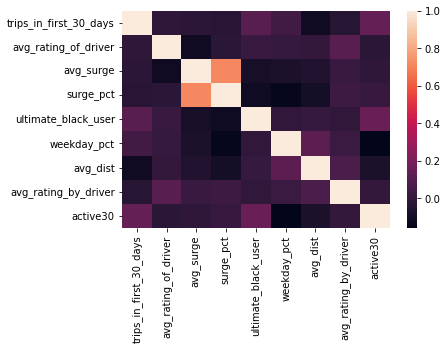

In [30]:
fig = plt.figure()
ax = plt.subplot()
corr = df_180.corr()
ax = sns.heatmap(corr)
plt.show()

In [31]:
corr['active30'].sort_values(ascending=False)


active30                  1.000000
ultimate_black_user       0.155987
trips_in_first_30_days    0.141214
surge_pct                 0.013487
avg_rating_by_driver     -0.000636
avg_surge                -0.014167
avg_rating_of_driver     -0.030329
avg_dist                 -0.074592
weekday_pct              -0.157371
Name: active30, dtype: float64

We see that there is some, albeit low, correlations between a 6 month user that has been active in the last 30 days and their ultimate black membership and whether they have taken a trip in the first 30 days. Though more exploring is needed, if we can get customers to use the app within the first 30 days and/or become an ultimate black user, we could see an increase in active users. Maybe do reduced fair promotional trips early on or offer different options or tiers for people to become premium members.


In [32]:
df_180.active30.value_counts(normalize=True)*100


0    59.35521
1    40.64479
Name: active30, dtype: float64

In [33]:
#create dummy variables for categorical features
df_features = pd.get_dummies(df_180,columns=['city','phone','ultimate_black_user'])
df_features.head()
#set target and drop unuseful columns
target = df_features['active30']
df_features = df_features.drop(['last_trip_date','signup_date','active30'],axis=1)

In [34]:
#scale data
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [35]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3,random_state=42)

In [36]:
#build random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [37]:
rf.score(X_test,y_test)


0.7222222222222222

In [38]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.67619048 0.74285714 0.70192308 0.71153846 0.77884615]
Mean Cross Validated Score: 0.726043956043956


In [39]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.239355
4,weekday_pct,0.165127
6,avg_rating_by_driver,0.106306
1,avg_rating_of_driver,0.099178
0,trips_in_first_30_days,0.076244
3,surge_pct,0.071737
2,avg_surge,0.070897
8,city_King's Landing,0.039426
7,city_Astapor,0.027172
11,phone_iPhone,0.022601


It seems that city, phone, and ultimate black status are not as important as avg_dist or weekday_pct. 

In [40]:
#more metrics for our model
precision_recall_fscore_support(y_test,y_pred)

(array([0.74920635, 0.68115942]),
 array([0.78145695, 0.64090909]),
 array([0.7649919 , 0.66042155]),
 array([302, 220], dtype=int64))

In [41]:
#weighted metrics
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7205275669043785, 0.7222222222222222, 0.7209201009982156, None)

In [42]:
#generate confusion matrix
confusion_matrix(y_test,y_pred)

array([[236,  66],
       [ 79, 141]], dtype=int64)

While 70% accuracy is not bad, let's explore a logistic regression model. 

In [43]:
#initialize model
logit = LogisticRegression(solver='liblinear')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#instantiate and fit grid search object
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [44]:
grid.best_estimator_.C


0.7

In [45]:
#find coefficients from Logistic Regression
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_features.columns),logit_coef.coef_[0]),index=range(df_features.columns.shape[0]),columns=['feature','coefficient'])
df_coef

,feature,coefficient
0,trips_in_first_30_days,-0.145888
1,avg_rating_of_driver,-0.573021
2,avg_surge,0.747131
3,surge_pct,0.266925
4,weekday_pct,-1.150138
5,avg_dist,0.639615
6,avg_rating_by_driver,-1.157489
7,city_Astapor,-0.789635
8,city_King's Landing,0.991956
9,city_Winterfell,-0.202501


In [46]:
df_coef['absolute_coefficient'] = df_coef['coefficient'].abs()

In [47]:
df_coef.head()

,feature,coefficient,absolute_coefficient
0,trips_in_first_30_days,-0.145888,0.145888
1,avg_rating_of_driver,-0.573021,0.573021
2,avg_surge,0.747131,0.747131
3,surge_pct,0.266925,0.266925
4,weekday_pct,-1.150138,1.150138


In [48]:
def color(coef):
    if coef >= 0:
        return 'green' 
    else:
        return 'red'
df_coef['color'] = df_coef['coefficient'].apply(color)


In [49]:
df_coef

,feature,coefficient,absolute_coefficient,color
0,trips_in_first_30_days,-0.145888,0.145888,red
1,avg_rating_of_driver,-0.573021,0.573021,red
2,avg_surge,0.747131,0.747131,green
3,surge_pct,0.266925,0.266925,green
4,weekday_pct,-1.150138,1.150138,red
5,avg_dist,0.639615,0.639615,green
6,avg_rating_by_driver,-1.157489,1.157489,red
7,city_Astapor,-0.789635,0.789635,red
8,city_King's Landing,0.991956,0.991956,green
9,city_Winterfell,-0.202501,0.202501,red


<AxesSubplot:ylabel='feature'>

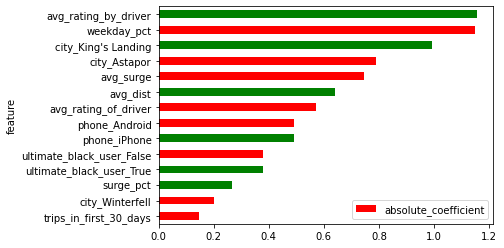

In [50]:
df_coef.set_index("feature").sort_values("absolute_coefficient").plot(kind='barh',y='absolute_coefficient', color=df_coef["color"])   

In [51]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))


0.7067948717948719


Random Forest Classifier appears to be slightly more accurate in this scenario however, the difference is marginal however. 

Our predictive models boast more than a 70% accuracy rate. 

Both models have provided insight to how to increase profit. Random Forrest pinpoints the most critical features and Logistic Regression shows us the effects of those features. 

The most crucial features that we conclude to determine if a six month user will remain active are:

<b>Weekday Percentage</b> (-1.161580): This feature has the largest negative coefficient, indicating that a higher percentage of weekday usage significantly decreases the likelihood of a user remaining active.

<b>Average Rating by Driver</b> (-1.162169): This feature also has a large negative coefficient, suggesting that a higher average rating given by the driver has a substantial negative effect on user activity.

<b>City - King's Landing</b> (0.994612): Among the cities, being in King's Landing has the largest positive coefficient, indicating that users in King's Landing are much more likely to remain active compared to users in other cities.

<b>Average Surge</b> (0.778930): This feature has a large positive coefficient, suggesting that a higher average surge multiplier has a significant positive impact on user activity.

<b>Average Distance</b> (0.652825): A longer average trip distance also has a substantial positive effect on user activity, as indicated by its coefficient.

Taking this into account, recommendations are:
1. Implement incentives to encourage riders to use the app on <b>weekends</b>.
2. Offer <b>incentives</b> for riders to increase the number of trips they take during their <b>first 30 days</b> on the app.
3. Promote honest <b>user ratings</b> by drivers, discouraging artificial inflation of ratings, especially for new users.
